<a href="https://colab.research.google.com/github/kocurvik/edu/blob/master/THRISS/solutions_02_exercise_projection_triangulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projection and Triangulation Exercises

In these exercises we will implement tha basic projection and triangulation algorithms.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
!wget https://github.com/kocurvik/edu/blob/master/THRISS/resources/projection_exercise.png?raw=true
!mv projection_exercise.png\?raw\=true projection_exercise.png
!wget https://github.com/kocurvik/edu/blob/master/THRISS/resources/triangulation_exercise_1.png?raw=true
!mv triangulation_exercise_1.png\?raw\=true triangulation_exercise_1.png
!wget https://github.com/kocurvik/edu/blob/master/THRISS/resources/triangulation_exercise_2.png?raw=true
!mv triangulation_exercise_2.png\?raw\=true triangulation_exercise_2.png

--2024-06-10 12:53:57--  https://github.com/kocurvik/edu/blob/master/THRISS/resources/projection_exercise.png?raw=true
Resolving github.com (github.com)... 140.82.116.4
Connecting to github.com (github.com)|140.82.116.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/kocurvik/edu/raw/master/THRISS/resources/projection_exercise.png [following]
--2024-06-10 12:53:58--  https://github.com/kocurvik/edu/raw/master/THRISS/resources/projection_exercise.png
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/kocurvik/edu/master/THRISS/resources/projection_exercise.png [following]
--2024-06-10 12:53:58--  https://raw.githubusercontent.com/kocurvik/edu/master/THRISS/resources/projection_exercise.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com 

## Exercise 1 - Projection using the simple pinhole camera model

In this exercise we want to project points from 3D space to images. We will work with knwon 3D position of the checkerboard corners, known camera intrinsics, rotation and translation w.r.t. the coordinate system in which we know the 3D points.

You should implement projection with a simple pinhole camera using the following equation:
$$\vec{x} = P \vec{X} = K [R | \vec{t}] \vec{X},$$
where $\vec{x}$ are the image coordinates in homogeneous coordinates, $\vec{X}$ are the 3D points in homogeneous coordinats, $K$ is the intrinsic matrix, $R$ is the rotation matrix and $\vec{t}$ is the translation vector.

We will first setup all the data for this exercise.

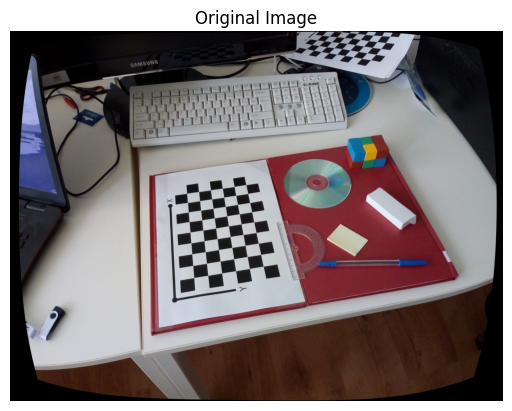

In [3]:
# This code will setup all of the necessary values for exerice 1

img = cv2.imread('projection_exercise.png')

plt.imshow(img[:, :, ::-1])
plt.title('Original Image')
plt.axis('off')
plt.show()


objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = 22 * np.mgrid[0:9,0:6].T.reshape(-1,2)

print("We want to project these chessboard 3D points (showing first 5) ")
print(objp[:5])

K = np.array(
[[3.41456500e+03, 0.00000000e+00, 2.01560901e+03],
 [0.00000000e+00, 3.42943840e+03, 1.45426650e+03],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

t =  np.array([-85.23746765, 115.60455788, 631.5343402 ])
R = np.array(
[[-0.15943304,  0.98620254,  0.04456074],
 [-0.75660247, -0.15106063,  0.6361866 ],
 [ 0.63414021,  0.0677144,   0.77024733]])

print("With these parameters")
print("K:")
print(K)
print("R:")
print(R)
print("t:", t)

### Implement your solution here:

Don't forget about the homogeneous coordinates!

In [4]:
def project_points(K, R, t, X):
  # Write this function to project the points using the pinhole camera model
  # params:
  # K - 3 x 3 matrix of intrinsic parameters
  # R - 3 x 3 Rotation matrix
  # t - 3-dimensional translation vector
  # X - N x 3 array with each row representing a 3D point
  # outputs:
  # x - N x 2 array representeing the coordinates of the projected point

  P = np.empty((3, 4))
  P[:, :3] = R
  P[:, 3] = t
  P = K @ P

  X = np.column_stack([X, np.ones(len(X))])

  x = P @ X.T
  x = x[:2] / x[2]

  return x.T

We want to project these chessboard 3D points (showing first 5) 
[[ 0.  0.  0.]
 [22.  0.  0.]
 [44.  0.  0.]
 [66.  0.  0.]
 [88.  0.  0.]]
With these parameters
K:
[[3.41456500e+03 0.00000000e+00 2.01560901e+03]
 [0.00000000e+00 3.42943840e+03 1.45426650e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
R:
[[-0.15943304  0.98620254  0.04456074]
 [-0.75660247 -0.15106063  0.6361866 ]
 [ 0.63414021  0.0677144   0.77024733]]
t: [-85.23746765 115.60455788 631.5343402 ]


### You can test your code here:

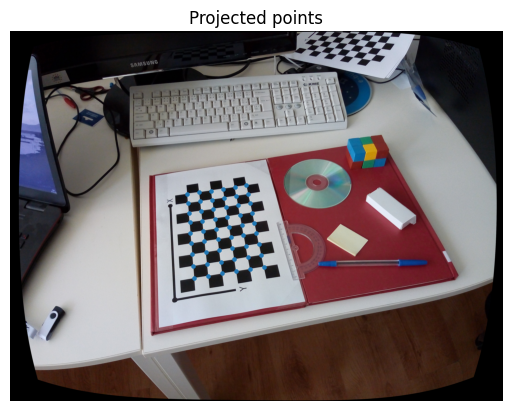

In [5]:
# This code will test your function
x = project_points(K, R, t, objp)

plt.imshow(img[:, :, ::-1])
plt.scatter(x[:, 0], x[:, 1], 5)
plt.axis("off")
plt.title("Projected points")
plt.show()

## Exercise 2 - Triangulation

In this exercise we will do the reverse and instead get 3D coordinates from pairs of points detected in two images with known parameters. In order to do this you should use the method [cv2.triangulatePoints](https://docs.opencv.org/4.10.0/d9/d0c/group__calib3d.html#gad3fc9a0c82b08df034234979960b778c) from OpenCV.

*Bonus exercise*: If you finish the exercise sooner you can write your own version of `cv2.triangulatePoints` by using SVD as shown in the slides.

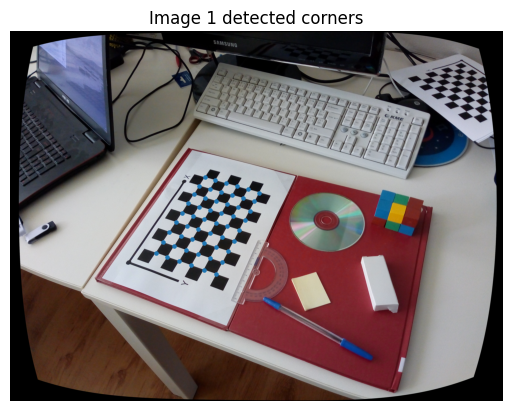

With these parameters
K:
[[3.41456500e+03 0.00000000e+00 2.01560901e+03]
 [0.00000000e+00 3.42943840e+03 1.45426650e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
R:
[[ 0.39157994  0.91719517  0.07360825]
 [-0.72811284  0.2599536   0.63425217]
 [ 0.5625983  -0.30195554  0.76961419]]
t: [-151.23437649   79.39177467  657.38235654]


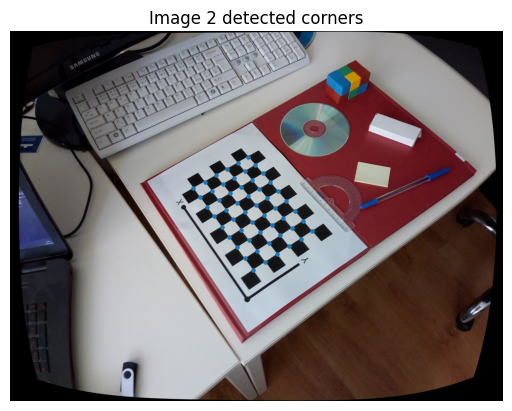

With these parameters
K:
[[3.41456500e+03 0.00000000e+00 2.01560901e+03]
 [0.00000000e+00 3.42943840e+03 1.45426650e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
R:
[[-0.55891876  0.82759072  0.05199438]
 [-0.70000056 -0.50450505  0.50544424]
 [ 0.44453239  0.24610617  0.8612913 ]]
t: [  6.15712681  97.32330748 596.80062833]


In [6]:
# This code will setup all of the necessary values for exerice 2

img1 = cv2.imread('triangulation_exercise_1.png')
img2 = cv2.imread('triangulation_exercise_2.png')

K = np.array(
[[3.41456500e+03, 0.00000000e+00, 2.01560901e+03],
 [0.00000000e+00, 3.42943840e+03, 1.45426650e+03],
 [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

R1 = np.array(
[[ 0.39157994,  0.91719517,  0.07360825],
 [-0.72811284,  0.2599536,   0.63425217],
 [ 0.5625983,  -0.30195554,  0.76961419]])
t1 = np.array([-151.23437649,   79.39177467,  657.38235654])


R2 = np.array(
[[-0.55891876,  0.82759072,  0.05199438],
[-0.70000056, -0.50450505,  0.50544424],
[ 0.44453239,  0.24610617,  0.8612913 ]])
t2 = np.array([6.15712681,  97.32330748, 596.80062833])

criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
_, corners1 = cv2.findChessboardCorners(gray1, (9,6), None)
corners1 = cv2.cornerSubPix(gray1,corners1, (11,11), (-1,-1), criteria)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
_, corners2 = cv2.findChessboardCorners(gray2, (9,6), None)
corners2 = cv2.cornerSubPix(gray2,corners2, (11,11), (-1,-1), criteria)

corners1 = corners1[:, 0, :]
corners2 = corners2[:, 0, :]

plt.imshow(img1[:, :, ::-1])
plt.scatter(corners1[:, 0], corners1[:, 1], 5)
plt.axis("off")
plt.title("Image 1 detected corners")
plt.show()

print("With these parameters")
print("K:")
print(K)
print("R:")
print(R1)
print("t:", t1)

plt.imshow(img2[:, :, ::-1])
plt.scatter(corners2[:, 0], corners2[:, 1], 5)
plt.axis("off")
plt.title("Image 2 detected corners")
plt.show()

print("With these parameters")
print("K:")
print(K)
print("R:")
print(R2)
print("t:", t2)

### Implement this function:

In [7]:
def get_3D_coordinates(K1, R1, t1, pts1, K2, R2, t2, pts2):
  # Write this function to triangulate points using two cameras
  # params:
  # K1 - 3 x 3 matrix of intrinsic parameters
  # R1 - 3 x 3 Rotation matrix
  # t1 - 3-dimensional translation vector
  # pts1 - N x 2 array with each row representing a 2D point in image coordinates
  # K2 - 3 x 3 matrix of intrinsic parameters
  # R2 - 3 x 3 Rotation matrix
  # t2 - 3-dimensional translation vector
  # pts2 - N x 2 array with each row representing a 2D point in image coordinates
  # outputs:
  # X - N x 3 array representeing the coordinates of the triangulated 3D point
  P1 = np.empty((3, 4))
  P1[:, :3] = R1
  P1[:, 3] = t1
  P1 = K1 @ P1

  P2 = np.empty((3, 4))
  P2[:, :3] = R2
  P2[:, 3] = t2
  P2 = K1 @ P2

  X = cv2.triangulatePoints(P1, P2, pts1.T, pts2.T)
  print(X.shape)
  X = X[:3] / X[3]
  return X.T

### You can check your results here

Since the original poitns were all on a plane we expect them to look like in the provided graph.

In [8]:
import plotly.express as px

xyz = get_3D_coordinates(K, R1, t1, corners1, K, R2, t2, corners2)

fig = px.scatter_3d(x = xyz[:, 0], y = xyz[:, 1], z=xyz[:, 2])
fig.update_traces(marker={'size': 3})


# You can comment these lines if your points are not within the range, but this
# will also change the scaling!
fig.update_layout(
  scene = dict(
    xaxis = dict(range=[-500,500],),
    yaxis = dict(range=[-500,500],),
    zaxis = dict(range=[-500,500],)))
fig.show()

(4, 54)
